In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

In [3]:
file_path = r'C:\Users\harsh\bank.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [5]:
X = df.drop(columns='y')
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3616, 16), (905, 16), (3616,), (905,))

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = clf.predict(X_test)
print("First 10 Predictions:", y_pred[:20])
print("First 10 True Values:", y_test[:20].values)

First 10 Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
First 10 True Values: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]


In [9]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8718232044198895
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       807
           1       0.42      0.47      0.44        98

    accuracy                           0.87       905
   macro avg       0.68      0.70      0.68       905
weighted avg       0.88      0.87      0.88       905



In [10]:
joblib.dump(clf, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [11]:
for column, encoder in label_encoders.items():
    joblib.dump(encoder, f'label_encoder_{column}.pkl')

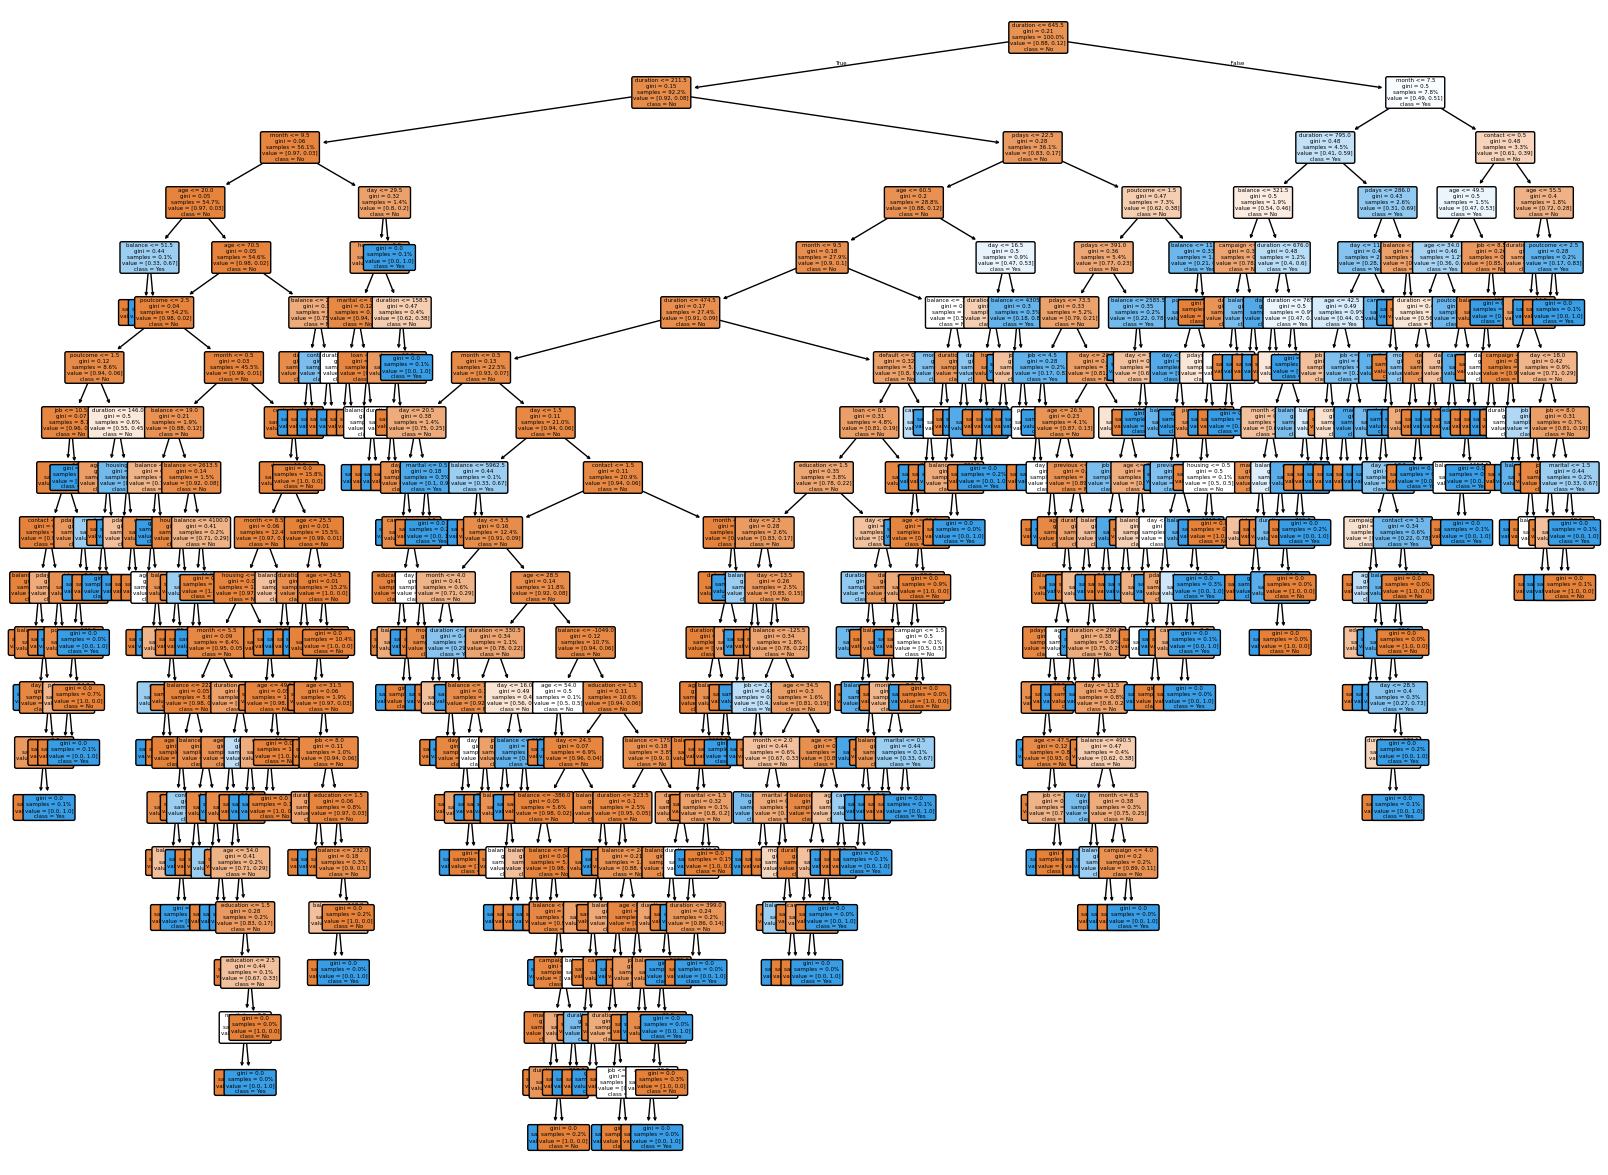

In [21]:
plt.figure(figsize=(20,15))  
plot_tree(clf, 
          filled=True,
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          rounded=True, 
          proportion=True,  
          precision=2, 
          fontsize=4)  
plt.show()